In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
string_seq_df = pd.read_csv("datasets/train/train_text_seq.csv")
string_seq_df

# count the number of leading zeroes
# sum the digits
# find the distributions of digits 

input_str  label
0     0000154364642718159661428002624223132284159626...      0
1     0004641596369515436422262614110471596262476161...      0
2     0001543626215965999614422464135806142624051159...      0
3     0000154364224641238614262159689561596284351061...      1
4     0004641899422154362069015966142624761262159661...      1
...                                                 ...    ...
7075  0000026267027181596614464154364222842626141596...      1
7076  0000464422155826261433491543615961596284614390...      1
7077  0003069915964309154366142624644222841795262614...      1
7078  0000614159615436198346426242237758262159694061...      0
7079  0000154366144221596464476126219231596614189926...      0

[7080 rows x 2 columns]

In [45]:
emote_df = pd.read_csv("datasets/train/train_emoticon.csv")
emote_df

# 1. split the string into individual characters
# 2. run a correlation matrix on each category
# check number of distinct emotes

# Split the string into individual characters
emote_df['characters'] = emote_df['input_emoticon'].apply(list)

# Create new columns for each character
for i in range(len(emote_df['characters'][0])):
    emote_df[f'c_{i+1}'] = emote_df['characters'].apply(lambda x: x[i] if len(x) > i else '')
l1 = [f'c_{i+1}' for i in range(len(emote_df['characters'][0]))]
edf = emote_df[l1].apply(lambda x: [ord(i) for i in x])
edf.insert(13, 'label', emote_df['label'])
emote_df[['input_emoticon', 'label']].head(25)

input_emoticon  label
0   üòõüõêüòªüòëüò£üô†üôØüöºüòíüôºüòëüôØüò£      0
1   üõêüòëüò™üòõüöºüôØüò£üöÖüòëüôØüòπüò£üôº      0
2   üòõüôØüòëüö°üò£üöºüõêüô≤üò£üôØüõëüòëüôº      0
3   üòõüöºüõêüôêüò£üôØüòëüô™üòëüôºüõÜüò£üôØ      1
4   üõêüöüüöºüòõüôãüòëüò£üôØüòπüôØüòëüò£üôº      1
5   üòëüò£üößüòõüöúüöºüôØüõêüôºüò£üòëüôïüôØ      1
6   üò£üòëüôØüöºüõêüö•üò¨üòõüò£üöÑüòëüôºüôØ      0
7   üö°üöºüòëüõêüöîüôØüòõüò£üòëüôØüõìüôºüò£      0
8   üõêüòõüõúüòëüöºüòöüò£üôØüò£üòëüôØüö†üôº      0
9   üôØüòëüô∑üõêüöºüò£üòõüòçüòøüôØüôºüòëüò£      1
10  üò£üôØüõêüòëüòõüöºüôöüòçüôØüôºüò£üòëüò∏      0
11  üòõüòØüöºüôØüòëüõêüòªüò£üôºüôØüòπüòëüò£      1
12  üòëüôØüòõüõêüöºüôíüöôüò£üôØüò£üòëüôºüò¨      1
13  üòøüò£üöºüö¥üòõüòëüôØüõêüò£üôØüòëüò¥üôº      1
14  üòõüõêüöºüöÇüôØüò¶üò£üòëüôØüòëüò£üôºüô®      1
15  üõêüöºüôØüõùüòëüòâüòõüò£üôíüò£üôºüòëüôØ      0
16  üò£üôØüòµüòëüòõüöÉüöºüõêüò£üôØüöúüôºüòë      0
17  üòõüòëüôØüöºüõÜüõêüòòüò£üò£üòäüôºüòëüôØ      0
18  üöüüò£üòëüõêüòåüöºüòõüôØüôØüò£üòëüòøüôº      1
19  üòõüöºüòëüò£üôßüõêüôØüòâüöçüò£üòëüôØüôº      0
20  üõìüõêüò£üöºüôØüö•üòëüòõüò¢üò£üôØüòëüôº      1
21  üò£üòëüöµüòõüöºüõêüôØüòäüôºüò£üôØüòëüò©      0
22  üõêüôØüòõüöºüò£üò¨üò†üòëüôØüôºüò£üòëüõ°      0
23  üõêüôØüöúüò£üöºüòëüò∞üòõüòëüôØüöèüôºüò£      1
24  üöºüòõüôØüò£üöóüõêüô∏üòëüò£üôºüôØüöåüòë      1

In [24]:
for i in range(1, 14):
    print(edf[f'c_{i}'].unique().size)

edf

213
213
213
213
213
213
213
213
91
91
91
91
91


c_1     c_2     c_3     c_4     c_5     c_6     c_7     c_8     c_9  \
0     128539  128720  128571  128529  128547  128608  128623  128700  128530   
1     128720  128529  128554  128539  128700  128623  128547  128645  128529   
2     128539  128623  128529  128673  128547  128700  128720  128626  128547   
3     128539  128700  128720  128592  128547  128623  128529  128618  128529   
4     128720  128671  128700  128539  128587  128529  128547  128623  128569   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
7075  128623  128570  128571  128529  128547  128720  128539  128700  128636   
7076  128720  128700  128517  128623  128547  128633  128539  128529  128529   
7077  128732  128529  128594  128539  128547  128623  128720  128700  128636   
7078  128547  128529  128539  128715  128720  128623  128700  128682  128623   
7079  128539  128547  128700  128529  128720  128569  128623  128685  128529   

        c_10    c_11    c_12    c_13  label  
0     128636  128529  128623  128547      0  
1     128623  128569  128547  128636      0  
2     128623  128721  128529  128636      0  
3     128636  128710  128547  128623      1  
4     128623  128529  128547  128636      1  
...      ...     ...     ...     ...    ...  
7075  128623  128547  128529  128672      1  
7076  128636  128547  128653  128623      1  
7077  128620  128623  128547  128529      1  
7078  128529  128704  128547  128636      0  
7079  128547  128671  128623  128636      0  

[7080 rows x 14 columns]

In [50]:
# using sklearn, create a basic decision tree classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into features and target variable
X = edf.drop('label', axis=1)
y = edf['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5543785310734464


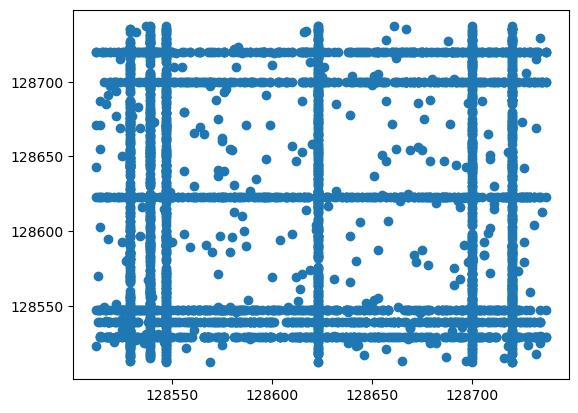

In [40]:
plt.scatter(edf['c_1'], edf['c_2'])

1. this could be sequential


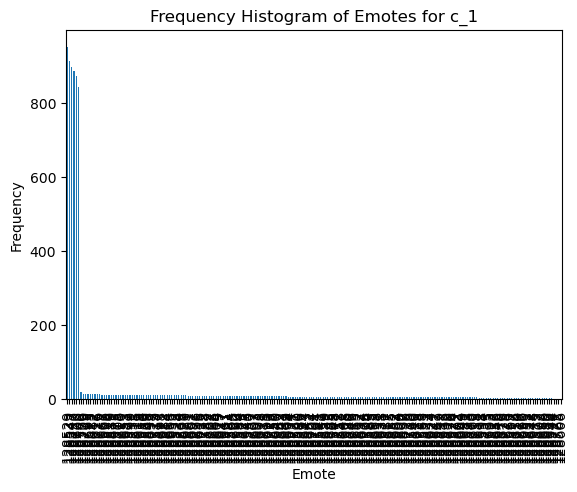

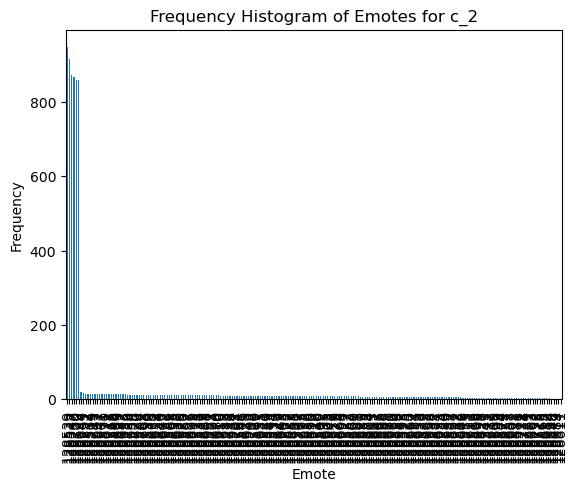

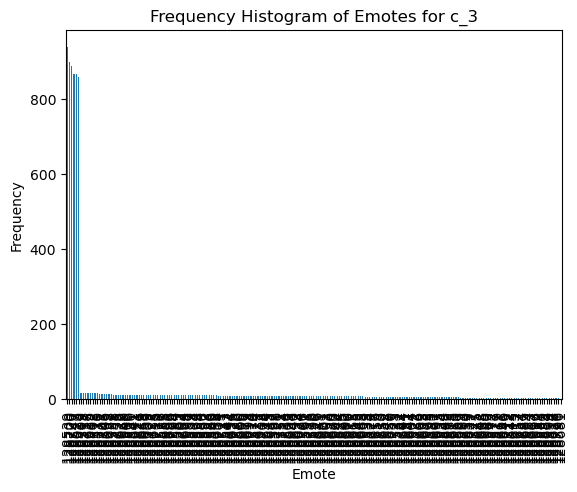

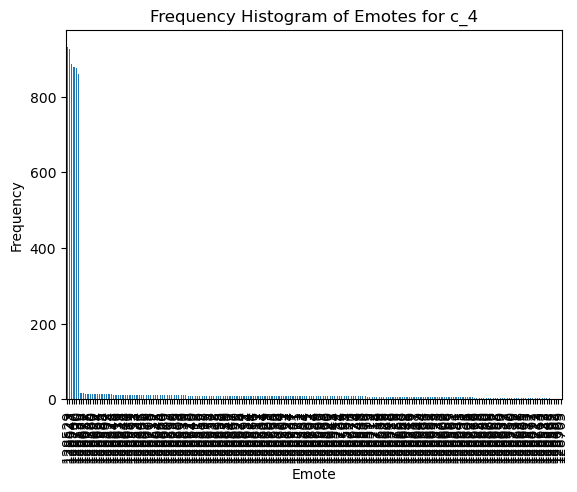

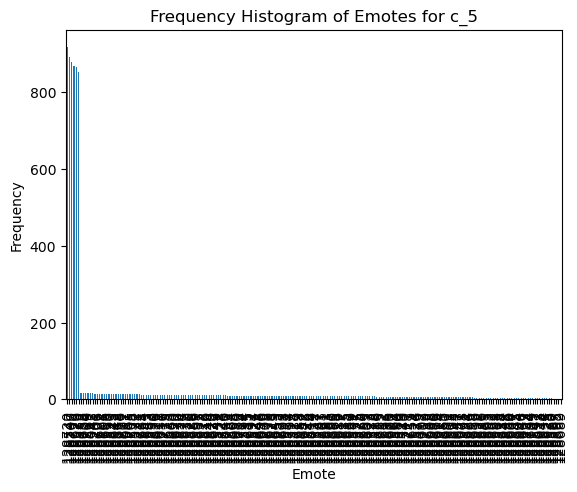

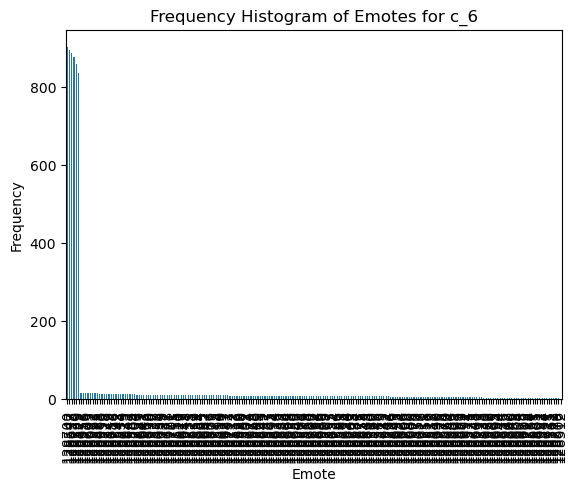

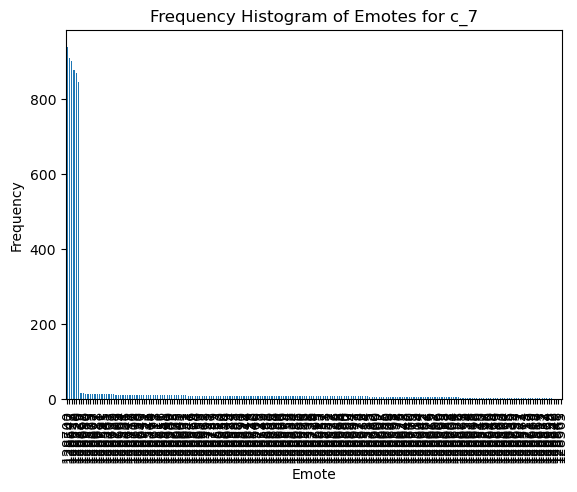

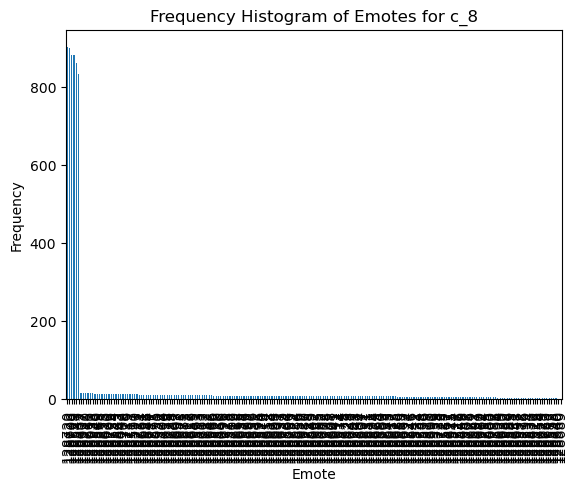

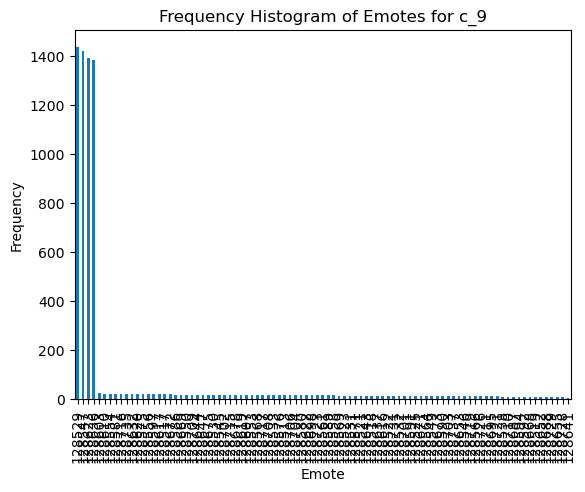

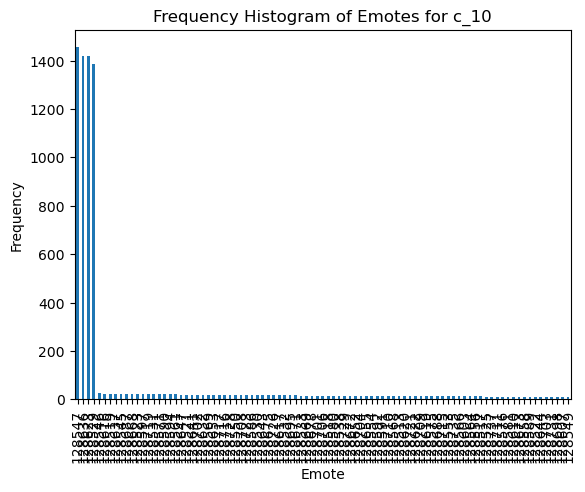

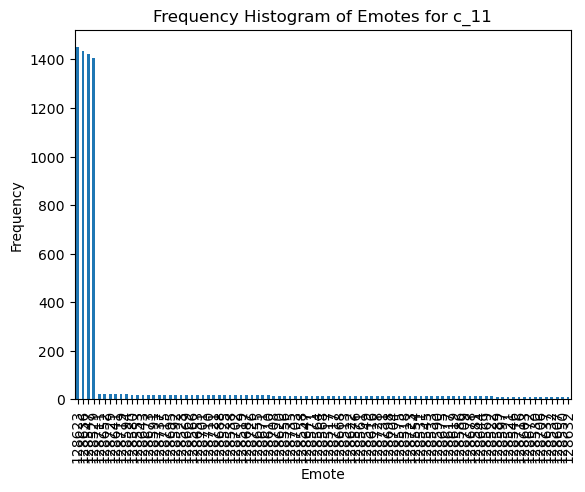

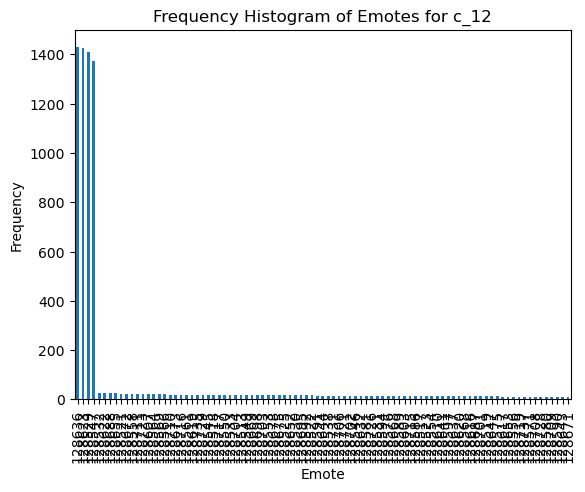

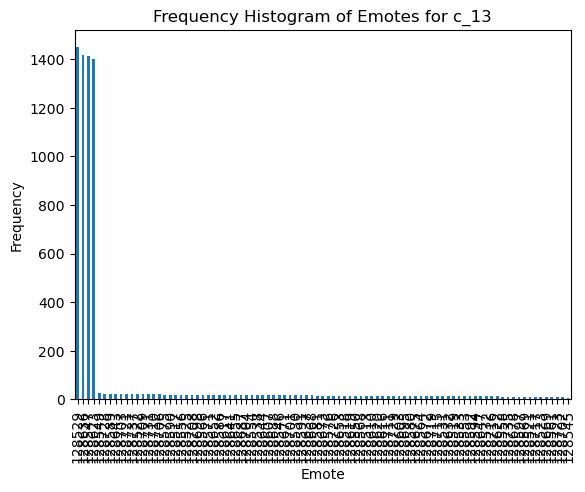

In [47]:
# create a frequency histogram of the emotes for each character
import matplotlib.pyplot as plt

# Create a frequency histogram of the emotes for each character
for col in edf.columns:
    if col.startswith('c_'):
        plt.figure()
        edf[col].value_counts().plot(kind='bar')
        plt.xlabel('Emote')
        plt.ylabel('Frequency')
        plt.title(f'Frequency Histogram of Emotes for {col}')
        plt.show()